# 第8章 绘图和可视化

## matplotlib API入门

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt #约定plt是matplotlib.pyplot的简写

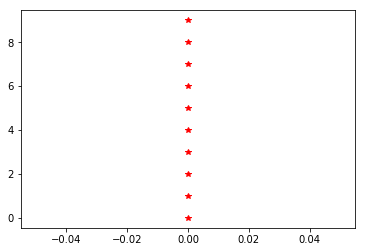

In [12]:
data = np.arange(10)
data
plt.plot([0]*10,data,"r*")

In [13]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

## Figure和Subplot
matplotlib的图像都位于Figure中。subplot是Figure中的子图

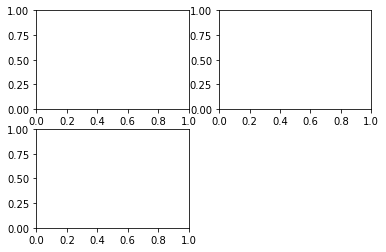

In [15]:
fig = plt.figure() #创建Figure
ax1 = fig.add_subplot(2, 2, 1) #创建subplot
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

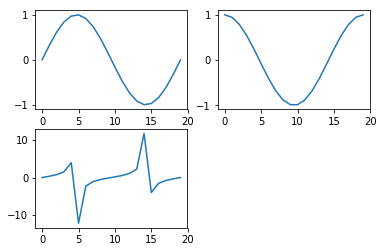

In [9]:
#为不同的subplot绘图
ax1.plot(np.sin(np.linspace(0,2*3.14,20)))
ax2.plot(np.cos(np.linspace(0,2*3.14,20)))
ax3.plot(np.tan(np.linspace(0,2*3.14,20)))
fig #在ipython notebook以外请用fig.show()来显示绘图

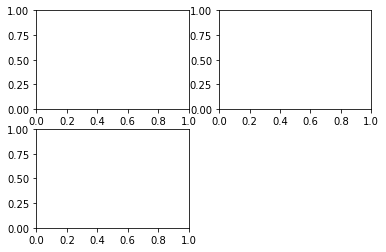

In [10]:
fig = plt.figure() #创建Figure
ax1 = fig.add_subplot(2, 2, 1) #创建subplot
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

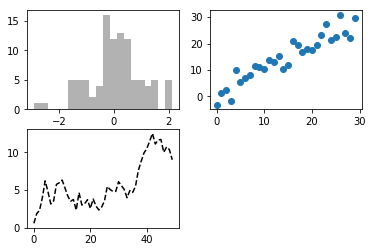

In [11]:
from numpy.random import randn
ax3.plot(randn(50).cumsum(), 'k--') #k--是一种线型
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))
_=ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1130afb38>,
      dtype=object)

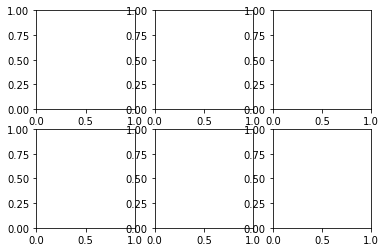

In [12]:
fig, axes = plt.subplots(2, 3)
axes

![subplots的选项](subplots的选项.png)

### 调整subplot周围的间距

函数`subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
`用于调整subplot周围的间距

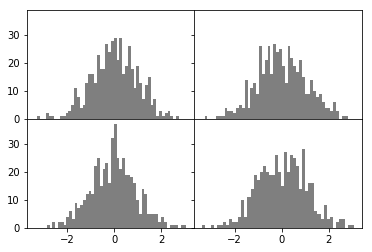

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)#水平和垂直的间距为0

## 颜色，标记和线型

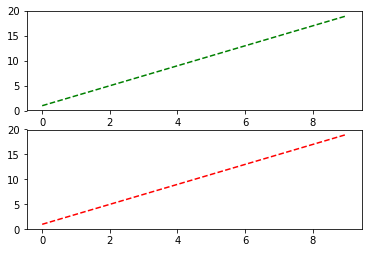

In [14]:
x=np.arange(0,10)
y=2*x+1
plt.subplot(2,1,1)
plt.plot(x, y, 'g--')
plt.subplot(2,1,2)
plt.plot(x, y, linestyle='--', color='r')

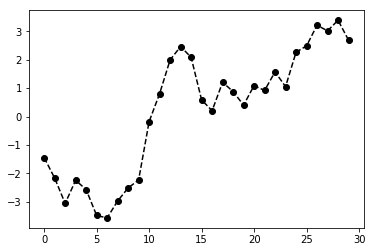

In [15]:
plt.plot(randn(30).cumsum(), 'ko--')

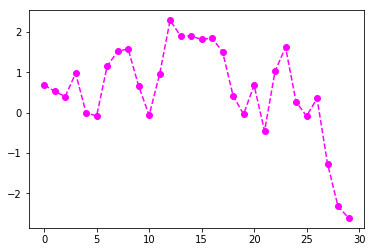

In [16]:
plt.plot(randn(30).cumsum(), color='#FF00FF', linestyle='dashed', marker='o')

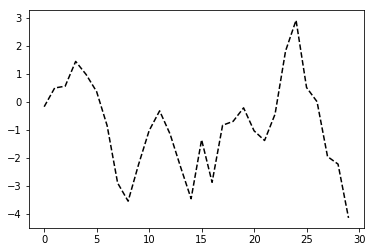

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

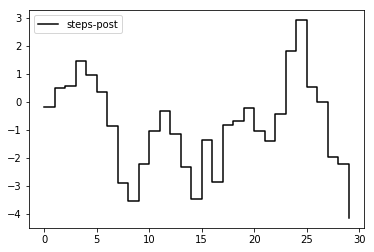

In [18]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 刻度，标签和图例

### 设置标题，轴标签，刻度以及刻度标签

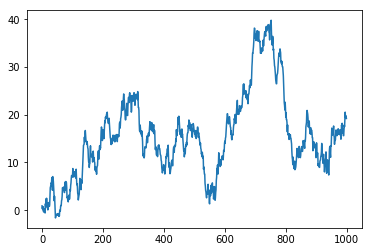

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

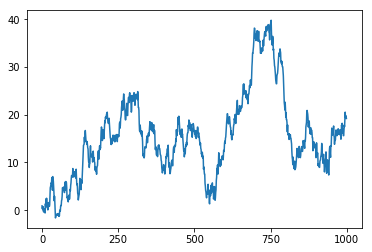

In [20]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
fig

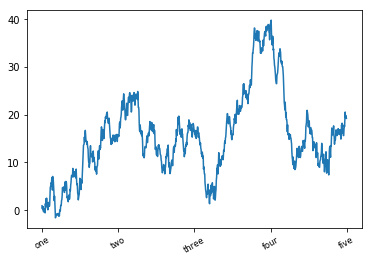

In [21]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
fig

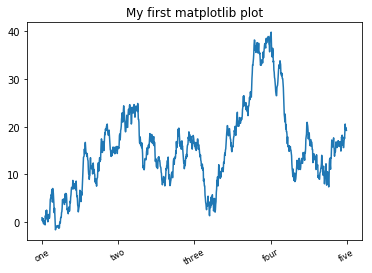

In [22]:
ax.set_title('My first matplotlib plot')
fig

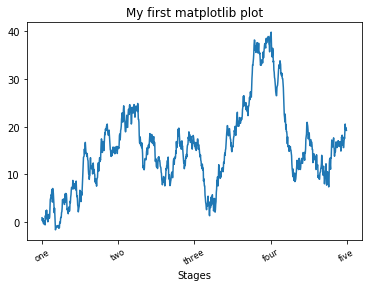

In [23]:
ax.set_xlabel('Stages')
fig

### 添加图例

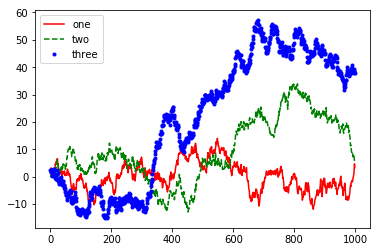

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one') #label设置图例
ax.plot(randn(1000).cumsum(), 'g--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')
ax.legend(loc='best') #显示图例

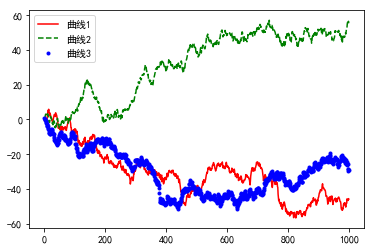

In [25]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='曲线1') #label设置图例
ax.plot(randn(1000).cumsum(), 'g--', label='曲线2')
ax.plot(randn(1000).cumsum(), 'b.', label='曲线3')
ax.legend(loc='best') #显示图例

## 注解以及在Subplot上绘图

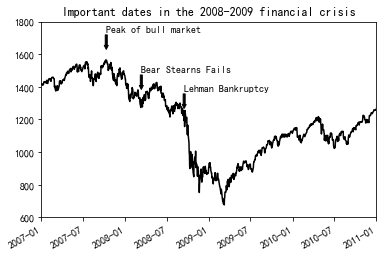

In [26]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

## 绘制几何图形

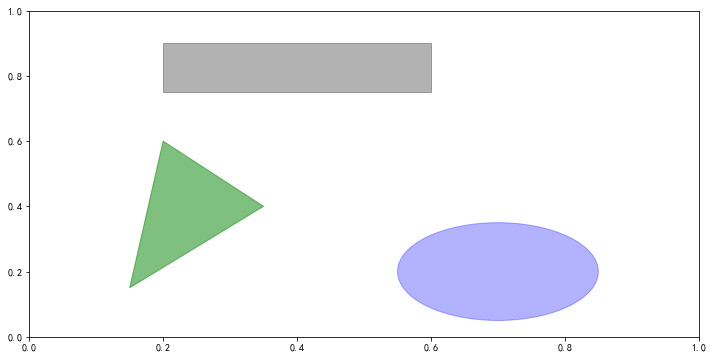

In [27]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件

In [ ]:
plt.savefig('figpath.svg')

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

![savefig选项](savefig选项.png)

## pandas中的绘图函数

### 线型图

In [28]:
plt.close('all')

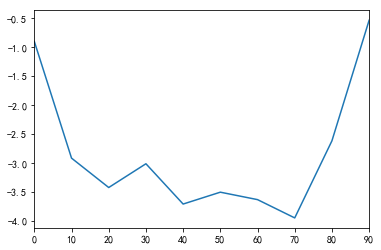

In [29]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

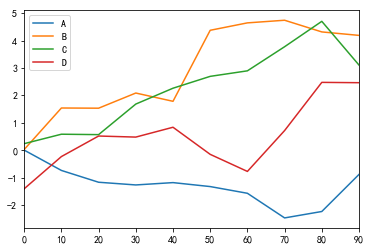

In [30]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 柱状图

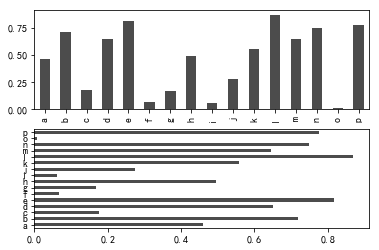

In [31]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [32]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.091352,0.939063,0.024254,0.157549
two,0.462843,0.408562,0.320489,0.701184
three,0.184752,0.121952,0.959977,0.218223
four,0.213635,0.539245,0.014579,0.886690
five,0.828736,0.435371,0.916118,0.297288
six,0.595789,0.930240,0.054364,0.800626


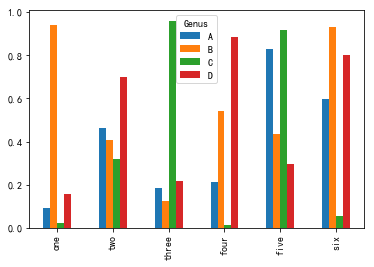

In [33]:
df.plot(kind='bar')

In [34]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [35]:
party_counts = party_counts.ix[:, 2:5]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [36]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


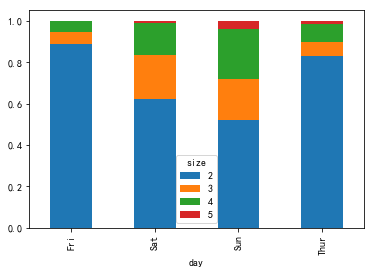

In [37]:
party_pcts.plot(kind='bar', stacked=True)

### 直方图和密度图

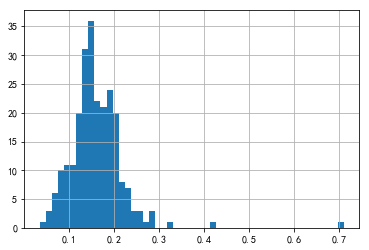

In [38]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

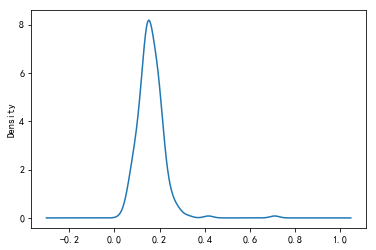

In [39]:
tips['tip_pct'].plot(kind='kde')

In [40]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)

In [41]:
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)

In [42]:
values = Series(np.concatenate([comp1, comp2]))

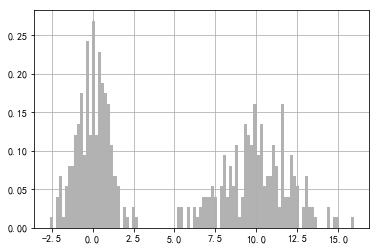

In [43]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

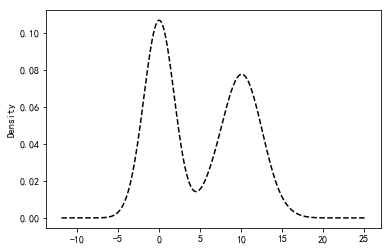

In [44]:
values.plot(kind='kde', style='k--')

### 散布图

In [45]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


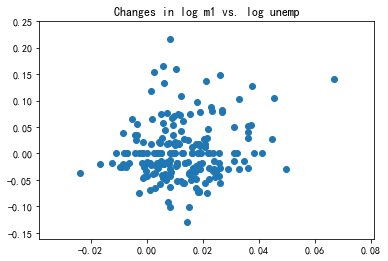

In [46]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

## 绘制地图：图形化显示海底地震危机数据

In [ ]:
data = pd.read_csv('Haiti.csv')
data

In [ ]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

In [ ]:
data['CATEGORY'][:6]

In [ ]:
data.describe()

In [ ]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & 
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70) 
            & data.CATEGORY.notnull()]

In [ ]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [ ]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series) 
    return sorted(set.union(*cat_sets))

In [ ]:
def get_english(cat):
    code, names = cat.split('.') 
    if '|' in names:
        names = names.split(' | ')[1] 
    return code, names.strip()

In [ ]:
get_english('2. Urgences logistiques | Vital Lines')

In [ ]:
all_cats = get_all_categories(data.CATEGORY)

In [ ]:
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

In [ ]:
english_mapping['6c']

In [ ]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [ ]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                                        index=data.index, columns=code_index)

In [ ]:
dummy_frame.ix[:, :6]

In [ ]:
for row, cat in zip(data.index, data.CATEGORY): 
    codes = get_code(to_cat_list(cat)) 
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [ ]:
data.ix[:, 10:15]

以下部分需要安装basemap toolkit（http://matplotlib.github.com/basemap）

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere', lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='f')
    # draw coastlines, state and country boundaries, edge of map. m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) 
fig.subplots_adjust(hspace=0.05, wspace=0.05)
to_plot = ['2a', '1', '3c', '7a']
lllat=17.25; urlat=20.25; lllon=-75; urlon=-71
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,lllon=lllon, urlon=urlon) 
    cat_data = data[data['category_%s' % code] == 1]
    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

## Python图形化工具生态系统

### Chaco

### mayavi

### 其他库

### 图形化工具的未来